In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import typing as tp
import plotly.express as px

In [3]:
data: pd.DataFrame = pd.read_csv('C:/Users/memel/Desktop/ДЗ, лабы/Питон/Лабораторная 1/train.csv')
'''Исходный набор данных'''
data

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,1003
7256,8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,764
7257,8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,694
7258,8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,712


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                7260 non-null   int64  
 1   Date              7260 non-null   object 
 2   Hour              7260 non-null   int64  
 3   Temperature       7260 non-null   float64
 4   Humidity          7260 non-null   int64  
 5   Wind_Speed        7260 non-null   float64
 6   Visibility        7260 non-null   int64  
 7   Dew_Point         7260 non-null   float64
 8   Solar_Radiation   7260 non-null   float64
 9   Rainfall          7260 non-null   float64
 10  Snowfall          7260 non-null   float64
 11  Season            7260 non-null   object 
 12  IsHoliday         7260 non-null   int64  
 13  IsFunctioningDay  7260 non-null   int64  
 14  Bikes_Rented      7260 non-null   int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 850.9+ KB


In [5]:
encoder = OneHotEncoder()
season_enc = encoder.fit_transform(data[['Season']]).toarray()
season_enc = pd.DataFrame(data=season_enc, columns=encoder.get_feature_names_out(['Season']))
data = pd.concat([data.drop(columns=['Season']), season_enc], axis=1)

In [6]:
data.index = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.drop(columns=['Date'], inplace=True)
data['Day_of_week'] = data.index.day_of_week

In [7]:
data.columns

Index(['Id', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Dew_Point', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'IsHoliday',
       'IsFunctioningDay', 'Bikes_Rented', 'Season_Autumn', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Day_of_week'],
      dtype='object')

In [8]:
categorial_columns: list = ['Season_Autumn', 'Season_Spring','Season_Summer',
                       'Season_Winter']
numerical_columns: list = [*data.drop(columns=['Season_Autumn', 'Season_Spring',
                        'Season_Summer', 'Season_Winter']).columns]

In [9]:
numerical_columns

['Id',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_Speed',
 'Visibility',
 'Dew_Point',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'IsHoliday',
 'IsFunctioningDay',
 'Bikes_Rented',
 'Day_of_week']

## 1. Глубокий анализ временных рядов


### Агрегация по периодам времени


Разобьем данные на дни, недели и месяцы

In [10]:
daily_data = data.resample('D')
'''Общие данные по дням'''
weekly_data = data.resample('W')
'''Общие данные по неделям'''
monthly_data = data.resample('M')
'''Общие данные по месяцам'''

'Общие данные по месяцам'

Посчитаем сумму и среднее прокатов 

In [11]:
daily_rented_bikes = data['Bikes_Rented'].resample('D').sum()
weekly_rented_bikes = data['Bikes_Rented'].resample('W').sum()
monthly_rented_bikes = data['Bikes_Rented'].resample('M').sum()

daily_rented_bikes_mean = data['Bikes_Rented'].resample('D').mean()
weekly_rented_bikes_mean = data['Bikes_Rented'].resample('W').mean()
monthly_rented_bikes_mean = data['Bikes_Rented'].resample('M').mean()

In [12]:
daily_temperature: pd.DataFrame = data['Temperature'].resample('D').mean()
weekly_temperature: pd.DataFrame = data['Temperature'].resample('W').mean()
monthly_temperature: pd.DataFrame = data['Temperature'].resample('M').mean()

Можно заметить, что в некоторые дни количество прокатов было очень малым или совсем отсутствовало по причине того, что в этот день прокат не работал (IsFunctioningDay = 0)

In [13]:
plt.style.use('seaborn-v0_8-whitegrid')

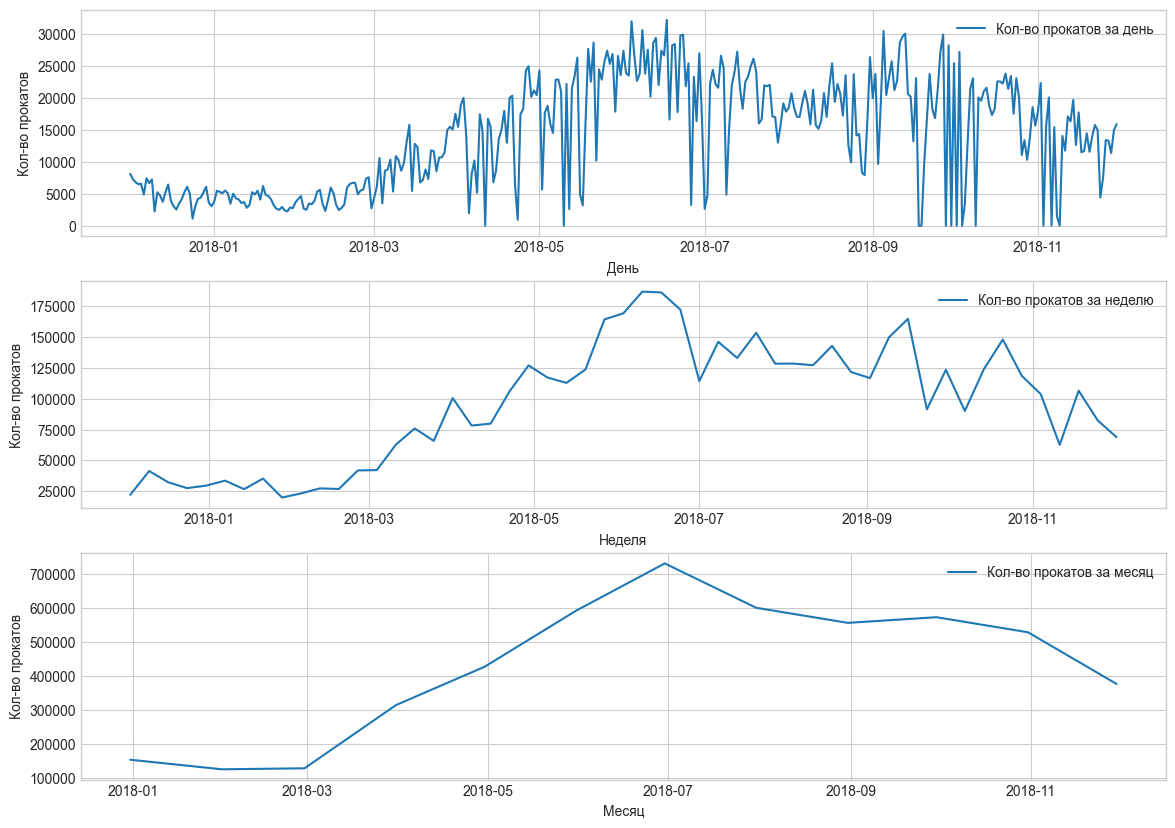

In [14]:
fig, ax = plt.subplots(3,1, figsize=(14,10))

# ax[0].set_yscale('log')
# ax[1].set_yscale('log')
# ax[2].set_yscale('log')

ax[0].plot(daily_rented_bikes.index, daily_rented_bikes, label='Кол-во прокатов за день')
ax[1].plot(weekly_rented_bikes.index, weekly_rented_bikes,label='Кол-во прокатов за неделю')
ax[2].plot(monthly_rented_bikes.index, monthly_rented_bikes, label='Кол-во прокатов за месяц')

# ax[0].plot(daily_rented_bikes.index, daily_rented_bikes_mean, label='Среднее прокатов за день')
# ax[1].plot(weekly_rented_bikes.index, weekly_rented_bikes_mean,
#          color='red',label='Среднее прокатов за неделю')
# ax[2].plot(monthly_rented_bikes.index, monthly_rented_bikes_mean,
#         color='green',  label='Среднее прокатов за месяц')

for i in range(3):
    ax[i].set_ylabel('Кол-во прокатов')
    ax[i].legend()
ax[0].set_xlabel('День')
ax[1].set_xlabel('Неделя')
ax[2].set_xlabel('Месяц')
plt.show()

Мы можем сделать выводы, что, как это ни странно, кол-во прокатов растет к теплому периоду года и находится в минимуме при холодном времени года. Пик достигается в июле, когда температура и сезон туризма в самом разгаре

Прокаты за месяц

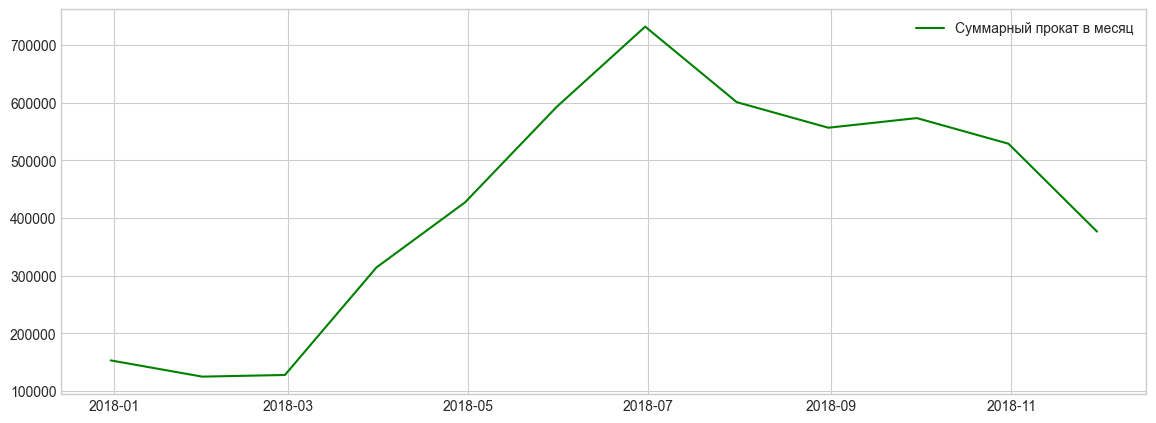

In [15]:
fig = plt.figure(figsize=(14,5))
plt.plot(monthly_rented_bikes.index, monthly_rented_bikes,
        color='green', label='Суммарный прокат в месяц')
plt.legend()
plt.show()

In [16]:
day_of_week_rented_bikes_mean: pd.Series = data.groupby('Day_of_week')['Bikes_Rented'].mean()
"""Данные о прокате велосипедов по дням недели"""
day_of_week_rented_bikes_mean.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                        'Friday', 'Saturday', 'Sunday']

In [17]:
day_of_week_rented_bikes_mean

Monday       715.255992
Tuesday      687.914598
Wednesday    745.383877
Thursday     673.380213
Friday       753.326415
Saturday     711.509143
Sunday       635.272640
Name: Bikes_Rented, dtype: float64

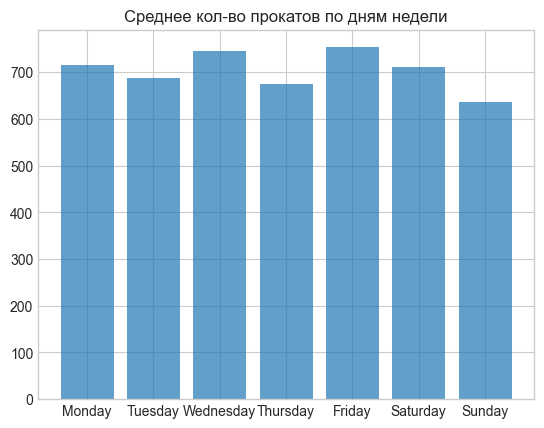

In [18]:
plt.bar(day_of_week_rented_bikes_mean.index, day_of_week_rented_bikes_mean, alpha=0.7)
plt.title('Среднее кол-во прокатов по дням недели')
plt.show()

### Сезонные закономерности

In [19]:
workdays_data: pd.DataFrame = data.loc[
    (data['Day_of_week'] == 5) | (data['Day_of_week'] == 6)]
'''Рабочие дни из основного набора данных'''
weekend_data: pd.DataFrame = data.loc[
    (data['Day_of_week'] != 5) | (data['Day_of_week'] != 6)]
'''Выходные дни из основного набора данных'''


'Выходные дни из основного набора данных'

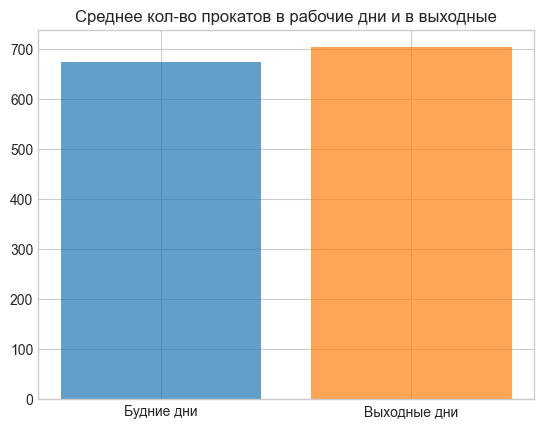

In [20]:
plt.bar('Будние дни', workdays_data['Bikes_Rented'].mean(), alpha=0.7)
plt.bar('Выходные дни', weekend_data['Bikes_Rented'].mean(), alpha=0.7)
plt.title('Среднее кол-во прокатов в рабочие дни и в выходные')
plt.show()

Можно заметить, что среднее кол-во прокатов не особо меняется на выходных

In [21]:
hourly_rented_bikes: pd.DataFrame = data.pivot(columns='Hour', values='Bikes_Rented')
'''Кол-во прокатов велосипедов для каждого дня по часам'''
hourly_rented_bikes = pd.concat([hourly_rented_bikes, daily_data['Day_of_week'].mean()],
                                axis=1)

У нас возникли NaN. Заполним их средним по таблице

In [22]:
hourly_rented_bikes.fillna(round(hourly_rented_bikes.mean()), inplace=True)

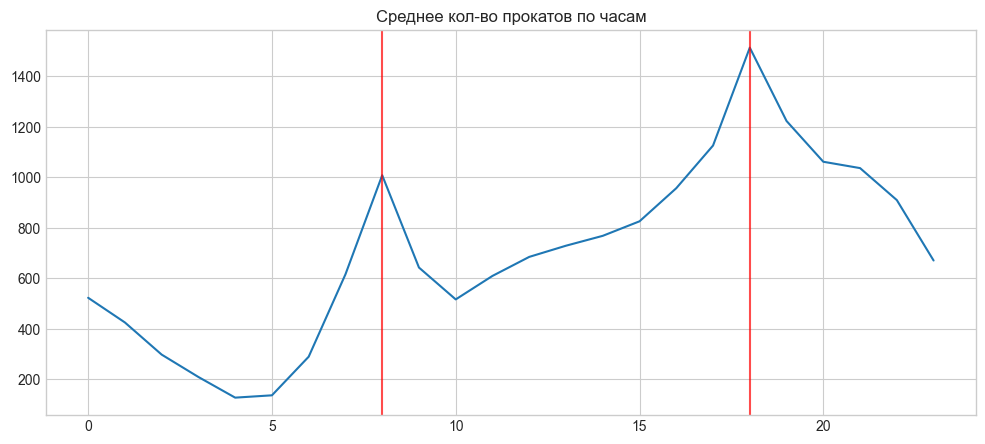

In [23]:
fig = plt.figure(figsize=(12,5))
plt.plot(range(0,24), hourly_rented_bikes.drop(columns='Day_of_week').mean())
plt.axvline(8, color='r', alpha=0.7)
plt.axvline(18, color='r', alpha=0.7)
plt.title('Среднее кол-во прокатов по часам')
plt.show()

Наблюдается пик прокатов в районе 8 часов утра, когда люди едут на работу и туристы берут велосипеды с утра для прогулок, а также в районе 17-19 часов, когда люди завершают работу и туристы выходят на вечернюю погулку.

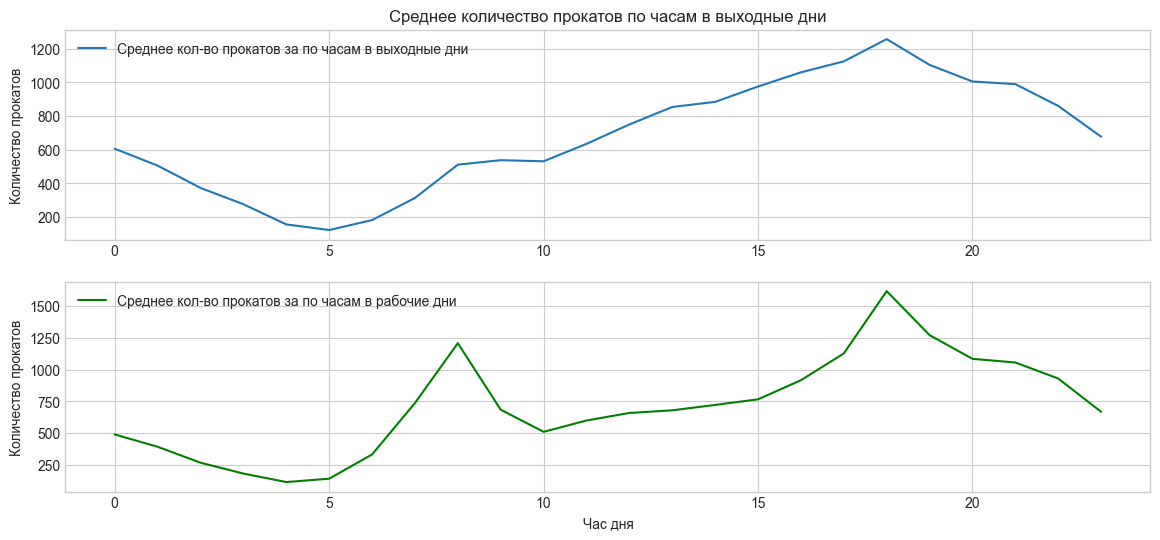

In [24]:
fig, (ax0, ax1) = plt.subplots(2,1, figsize=(14,6))

ax0.plot(range(0,24),
        hourly_rented_bikes.loc[(hourly_rented_bikes['Day_of_week'] == 5) | 
            (hourly_rented_bikes['Day_of_week'] == 6)].drop(columns='Day_of_week').mean(),
        label='Среднее кол-во прокатов за по часам в выходные дни')
ax1.plot(range(0,24), 
        hourly_rented_bikes.loc[(hourly_rented_bikes['Day_of_week'] != 5) &
            (hourly_rented_bikes['Day_of_week'] != 6)].drop(columns='Day_of_week').mean(),
        label='Среднее кол-во прокатов за по часам в рабочие дни',
        color='green')

ax0.set_title('Среднее количество прокатов по часам в выходные дни')
ax0.set_ylabel('Количество прокатов')
ax1.set_ylabel('Количество прокатов')
ax1.set_xlabel('Час дня')
ax0.legend()
ax1.legend()

plt.show()

В рабочее время прокатов в абсолютном значении больше. Скорее всего, это связано с тем, что люди ездят на работу и после работы на велосипедах. 

Общая картина выглядит примерно одинаково. На выходных наблюдается более плавный рост проката к вечеру, в то время как по будним дням резкие переходы обусловлены работой многих людей


### Выбросы и аномалии

In [25]:
data.columns

Index(['Id', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Dew_Point', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'IsHoliday',
       'IsFunctioningDay', 'Bikes_Rented', 'Season_Autumn', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Day_of_week'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


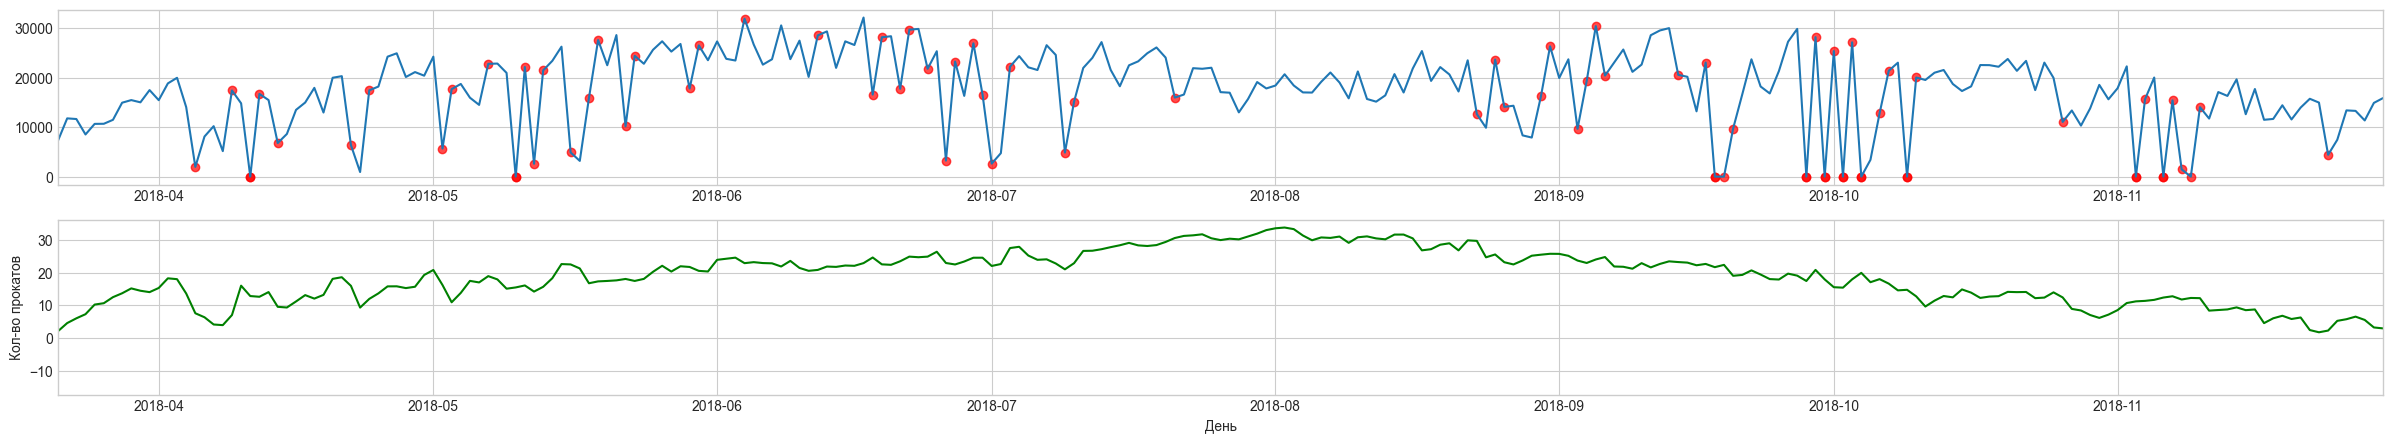

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(30,5))

# plt.yscale('log')

ax[0].plot(daily_rented_bikes.index, daily_rented_bikes, 
         label='Кол-во прокатов в день')

dates_emissions: list = []

bikes_emissions: list = []

daily_data_sum: pd.DataFrame = daily_data.sum() 
'''Сумма всех значений по столбцам (дни)'''

for date in daily_data_sum.index[1:]:
    prev_day = date - pd.Timedelta(days=1)
    if abs(daily_data_sum.loc[prev_day, 'Bikes_Rented'] - 
           daily_data_sum.loc[date, 'Bikes_Rented']) > 8000:
        dates_emissions.append(date)
        bikes_emissions.append(daily_data_sum.loc[date, 'Bikes_Rented'])

    if daily_data_sum.loc[date, 'IsFunctioningDay'] == 0:
        dates_emissions.append(date)
        bikes_emissions.append(daily_data_sum.loc[date, 'Bikes_Rented'])

ax[0].scatter(dates_emissions, bikes_emissions, label='Дни, когда прокат не работал',
            color='r', alpha=0.7)

ax[1].plot(daily_rented_bikes.index, daily_data.mean()['Temperature'], color='g')

plt.legend()
ax[0].set_xlim(daily_data_sum.index[110], daily_data_sum.index[-1])
ax[1].set_xlim(daily_data_sum.index[110], daily_data_sum.index[-1])
plt.ylabel('Кол-во прокатов')
plt.xlabel('День')
plt.show()

Рассмотрим, к примеру, день, когда наблюдался резкий перепад кол-ва аренды велосипедов 


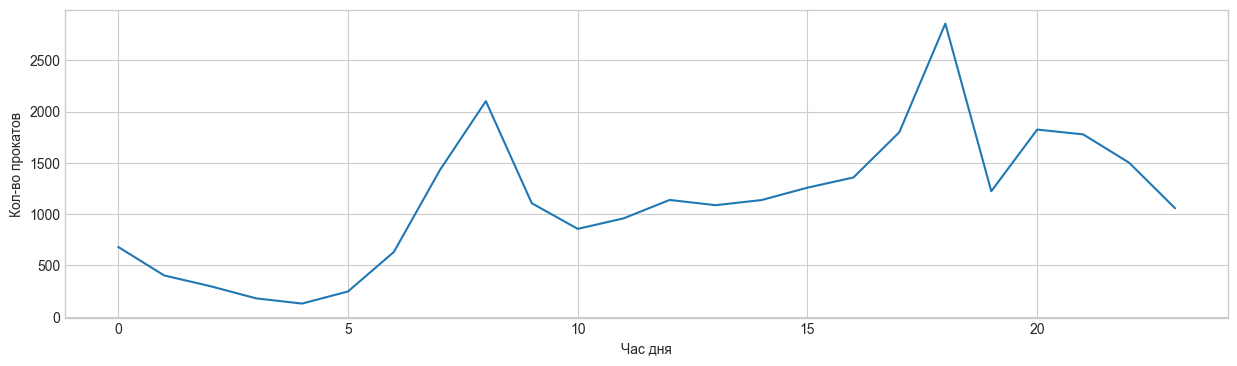

In [27]:
fig = plt.figure(figsize=(15,4))
plt.plot(hourly_rented_bikes.drop(columns=['Day_of_week']).columns, 
         hourly_rented_bikes.drop(columns=['Day_of_week']).loc['2018-10-01'])
plt.xlabel('Час дня')
plt.ylabel('Кол-во прокатов')
plt.show()

In [28]:
#TODO: Почему здесь такие выбросы

## 2. Обогащение и соединение данных

### Интеграция нескольких источников

In [29]:
holidays_in_Korea: dict = {
    "Date": [
        "25/12/2017", "01/01/2018", "15/02/2018", "01/03/2018", "05/05/2018",  
        "22/05/2018", "06/06/2018", "17/07/2018", "15/08/2018", "24/09/2018",  
        "03/10/2018", "09/10/2018", "25/12/2018"  
    ],
    "Description": [
        "Рождество Христово", "Новый год", "Корейский Новый год (Соллаль)", 
        "День движения за независимость", "День детей", "День рождения Будды", 
        "День памяти", "День Конституции", "День освобождения", "Чхусок (День урожая)", 
        "День основания государства", "День хангыля", "Рождество Христово"
    ]}
'''Внешние данные о праздниках в Корее'''

holidays_data: pd.DataFrame = pd.DataFrame(holidays_in_Korea)
'''Датафрейм с данными о праздниках в Корее'''

holidays_data.index = pd.to_datetime(holidays_data['Date'], format='%d/%m/%Y')
holidays_data['Is_Official_Holiday'] = [1 for _ in range(holidays_data.shape[0])]
holidays_data.drop(columns=['Date','Description'], inplace=True)

In [30]:
extended_data: pd.DataFrame = data.merge(holidays_data, how='left', left_index=True, right_index=True)
"""Исходные данные, но с официальными праздниками"""
extended_data['Is_Official_Holiday'].fillna(0, inplace=True)

In [31]:
extended_data.head()

,Id,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,IsHoliday,IsFunctioningDay,Bikes_Rented,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Day_of_week,Is_Official_Holiday
Date,,,,,,,,,,,,,,,,,,,
2017-12-01,0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,254,0.0,0.0,0.0,1.0,4,0.0
2017-12-01,1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,204,0.0,0.0,0.0,1.0,4,0.0
2017-12-01,2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,173,0.0,0.0,0.0,1.0,4,0.0
2017-12-01,3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,107,0.0,0.0,0.0,1.0,4,0.0
2017-12-01,4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,78,0.0,0.0,0.0,1.0,4,0.0


Добавим данные о погоде


In [32]:
weather_data: pd.DataFrame = pd.read_parquet('C:/Users/memel/Desktop/ДЗ, лабы/Питон/Лабораторная 2/daily_weather.parquet')
'''Погодные данные почти со всего мира'''
weather_data.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,41515,Asadabad,1957-07-01,Summer,27.0,21.1,35.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,41515,Asadabad,1957-07-02,Summer,22.8,18.9,32.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,41515,Asadabad,1957-07-03,Summer,24.3,16.7,35.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41515,Asadabad,1957-07-04,Summer,26.6,16.1,37.8,4.1,NaN,NaN,NaN,NaN,NaN,NaN
4,41515,Asadabad,1957-07-05,Summer,30.8,20.0,41.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
weather_data.drop(columns=['station_id', 'season',
                           'snow_depth_mm','avg_wind_dir_deg', 
                           'peak_wind_gust_kmh', 'avg_sea_level_pres_hpa',
                           'sunshine_total_min','avg_temp_c', 'avg_wind_speed_kmh'], inplace=True)

In [34]:
seoul_weather_data: pd.DataFrame = weather_data.loc[(weather_data.city_name == 'Seoul') & 
                 (weather_data.date >= '2017-12-01') & 
                 (weather_data.date <= '2018-11-30')]
'''Данные о погоде в Сеуле за декабрь 2017 - ноябрь 2018'''
seoul_weather_data.head()

,city_name,date,min_temp_c,max_temp_c,precipitation_mm
23509,Seoul,2017-12-01,-7.6,NaN,NaN
23510,Seoul,2017-12-02,-4.6,NaN,NaN
23511,Seoul,2017-12-03,NaN,NaN,4.1
23512,Seoul,2017-12-04,NaN,NaN,0.0
23513,Seoul,2017-12-05,-8.2,NaN,0.0


In [35]:
seoul_weather_data.index = pd.to_datetime(seoul_weather_data['date'])
seoul_weather_data.drop(columns=['city_name','date'], inplace=True)
seoul_weather_data.head()

C:\Users\memel\AppData\Local\Temp\ipykernel_10596\1542414450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_weather_data.drop(columns=['city_name','date'], inplace=True)


,min_temp_c,max_temp_c,precipitation_mm
date,,,
2017-12-01,-7.6,NaN,NaN
2017-12-02,-4.6,NaN,NaN
2017-12-03,NaN,NaN,4.1
2017-12-04,NaN,NaN,0.0
2017-12-05,-8.2,NaN,0.0


In [36]:
seoul_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-12-01 to 2018-11-30
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   min_temp_c        263 non-null    float64
 1   max_temp_c        138 non-null    float64
 2   precipitation_mm  158 non-null    float64
dtypes: float64(3)
memory usage: 11.4 KB


In [37]:
extended_data.head()

,Id,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,IsHoliday,IsFunctioningDay,Bikes_Rented,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Day_of_week,Is_Official_Holiday
Date,,,,,,,,,,,,,,,,,,,
2017-12-01,0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,254,0.0,0.0,0.0,1.0,4,0.0
2017-12-01,1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,204,0.0,0.0,0.0,1.0,4,0.0
2017-12-01,2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,173,0.0,0.0,0.0,1.0,4,0.0
2017-12-01,3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,107,0.0,0.0,0.0,1.0,4,0.0
2017-12-01,4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,78,0.0,0.0,0.0,1.0,4,0.0


In [38]:
new_data: pd.DataFrame = extended_data.merge(seoul_weather_data, how='left', 
                                    left_index=True, right_index=True)
'''Исходные данные + данные о праздниках и данные о погоде'''

'Исходные данные + данные о праздниках и данные о погоде'

Посмотрим на пропуски

In [39]:
new_data.isna().sum()

Id                        0
Hour                      0
Temperature               0
Humidity                  0
Wind_Speed                0
Visibility                0
Dew_Point                 0
Solar_Radiation           0
Rainfall                  0
Snowfall                  0
IsHoliday                 0
IsFunctioningDay          0
Bikes_Rented              0
Season_Autumn             0
Season_Spring             0
Season_Summer             0
Season_Winter             0
Day_of_week               0
Is_Official_Holiday       0
min_temp_c             2026
max_temp_c             4528
precipitation_mm       4128
dtype: int64

In [40]:
new_data.head()

,Id,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,...,Bikes_Rented,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Day_of_week,Is_Official_Holiday,min_temp_c,max_temp_c,precipitation_mm
2017-12-01,0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,254,0.0,0.0,0.0,1.0,4,0.0,-7.6,NaN,NaN
2017-12-01,1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,204,0.0,0.0,0.0,1.0,4,0.0,-7.6,NaN,NaN
2017-12-01,2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,173,0.0,0.0,0.0,1.0,4,0.0,-7.6,NaN,NaN
2017-12-01,3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,107,0.0,0.0,0.0,1.0,4,0.0,-7.6,NaN,NaN
2017-12-01,4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,78,0.0,0.0,0.0,1.0,4,0.0,-7.6,NaN,NaN


In [41]:
new_data.columns

Index(['Id', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Dew_Point', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'IsHoliday',
       'IsFunctioningDay', 'Bikes_Rented', 'Season_Autumn', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Day_of_week', 'Is_Official_Holiday',
       'min_temp_c', 'max_temp_c', 'precipitation_mm'],
      dtype='object')

За счет того, что в данных о погоде не было данных по часам, образовалось много пропусков. Заполним их средним по сезону

In [42]:
# Сгруппируем данные для вычисления среднего для каждого сезона
season_means = new_data.groupby(
    ['Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter']
)[['min_temp_c', 'max_temp_c', 'precipitation_mm']].mean()

# Для зимы max_temp_c NaN, поэтому заполним его медианой температуры из исходного
# набора данных для зимы
season_means.loc[(0,0,0,1), 'max_temp_c'] = new_data.loc[
    new_data.Season_Winter == 1, 'Temperature'].median()

def fill_nan_values(row):
    season = tuple(row[['Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter']])
    if np.isnan(row['min_temp_c']):
        row['min_temp_c'] = season_means.loc[season, 'min_temp_c']
    if np.isnan(row['max_temp_c']):
        row['max_temp_c'] = season_means.loc[season, 'max_temp_c']
    if np.isnan(row['precipitation_mm']):
        row['precipitation_mm'] = season_means.loc[season, 'precipitation_mm']

    return row

new_data = new_data.apply(fill_nan_values, axis=1)

In [43]:
season_means

min_temp_c  \
Season_Autumn Season_Spring Season_Summer Season_Winter               
0.0           0.0           0.0           1.0             -7.312130   
                            1.0           0.0             23.519537   
              1.0           0.0           0.0              8.180443   
1.0           0.0           0.0           0.0             10.085833   

                                                         max_temp_c  \
Season_Autumn Season_Spring Season_Summer Season_Winter               
0.0           0.0           0.0           1.0             -2.200000   
                            1.0           0.0             33.137568   
              1.0           0.0           0.0             17.300000   
1.0           0.0           0.0           0.0             18.980556   

                                                         precipitation_mm  
Season_Autumn Season_Spring Season_Summer Season_Winter                    
0.0           0.0           0.0           1.0                    1.755188  
                            1.0           0.0                    8.684916  
              1.0           0.0           0.0                    9.743126  
1.0           0.0           0.0           0.0                    7.521493

In [44]:
new_data.isna().sum()

Id                     0
Hour                   0
Temperature            0
Humidity               0
Wind_Speed             0
Visibility             0
Dew_Point              0
Solar_Radiation        0
Rainfall               0
Snowfall               0
IsHoliday              0
IsFunctioningDay       0
Bikes_Rented           0
Season_Autumn          0
Season_Spring          0
Season_Summer          0
Season_Winter          0
Day_of_week            0
Is_Official_Holiday    0
min_temp_c             0
max_temp_c             0
precipitation_mm       0
dtype: int64

## 3. Нестандартная аналитика и пользовательские метрики


### Анализ поведения клиентов (сегментация)


In [45]:
users: pd.DataFrame = pd.read_csv("C:/Users/memel/Desktop/ДЗ, лабы/Питон/Лабораторная 2/synthetic_users.csv")
'''Данные о пользователях'''
stations: pd.DataFrame = pd.read_csv("C:/Users/memel/Desktop/ДЗ, лабы/Питон/Лабораторная 2/synthetic_stations.csv")
'''Данные о точках проката'''
rentals: pd.DataFrame = pd.read_csv("C:/Users/memel/Desktop/ДЗ, лабы/Питон/Лабораторная 2/synthetic_rentals.csv")
'''Данные о операциях проката'''

'Данные о операциях проката'

In [46]:
rentals['date'] = pd.to_datetime(rentals['date'])
rentals['day_of_week'] = rentals['date'].dt.day_of_week

In [47]:
users.head()

,user_id,user_type,registration_date,preferred_hours,preferred_days,avg_rentals_per_month
0,U0001,periodic,2022-10-22,"10,11,12,13,14,15,16",weekday,4
1,U0002,rare,2022-04-28,"7,8,9",weekday,2
2,U0003,rare,2023-09-22,"7,8,9",weekend,3
3,U0004,periodic,2023-07-22,"7,8,17,18,19",weekend,7
4,U0005,frequent,2023-06-08,"7,8,9,12,13,17,18,19",weekday,32


In [48]:
rentals.head()

,rental_id,date,hour,minute,user_id,station_id,duration_minutes,day_of_week
0,R000000,2017-01-01,0,45,U0010,S034,28,6
1,R000001,2017-01-01,0,17,U0824,S031,31,6
2,R000002,2017-01-01,0,38,U0954,S035,45,6
3,R000003,2017-01-01,0,41,U0047,S061,55,6
4,R000004,2017-01-01,0,25,U0908,S079,21,6


Сегментация на типы пользователей уже есть, поэтому просто изучим их поведение. Обрабатывать категориальные данные для удобства, пока что не будем (да и не зачем, наверное)

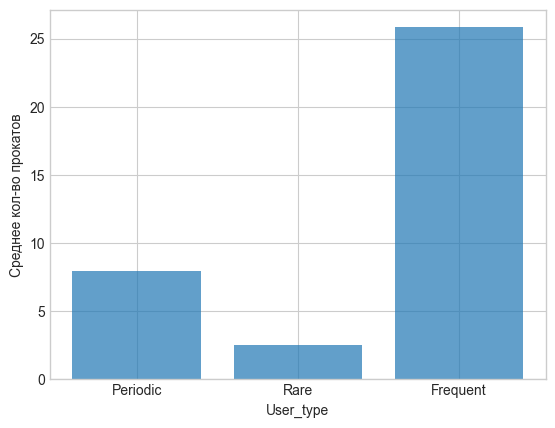

In [49]:
plt.bar(['Periodic', 'Rare', 'Frequent'], 
        [users.loc[users.user_type== 'periodic']['avg_rentals_per_month'].mean(),
         users.loc[users.user_type== 'rare']['avg_rentals_per_month'].mean(),
         users.loc[users.user_type== 'frequent']['avg_rentals_per_month'].mean()],
         alpha=0.7)

plt.xlabel('User_type')
plt.ylabel('Среднее кол-во прокатов')
plt.show()

In [50]:
frequent_users: pd.DataFrame = users.loc[users.user_type == 'frequent']
periodic_users: pd.DataFrame = users.loc[users.user_type == 'periodic']
rare_users: pd.DataFrame = users.loc[users.user_type == 'rare']

In [51]:
def get_hour_distribution(user_type: pd.DataFrame,
                          is_dates: bool =False) -> dict[str, float]:
    '''
    Функция для получения распределения пользования прокатом по часам
    среди пользователей user_type
    '''
    if is_dates:
        date_dict: dict[str, float] = {str(day): 0 for day in range(0,7)}
        # Возьмем id пользователей данного типа
        user_ids = set(user_type['user_id'])
        # Рассмотрим только их операции
        user_type_rentals = rentals[rentals['user_id'].isin(user_ids)]
        for _,row in user_type_rentals.iterrows():
            day = str(row['day_of_week'])
            date_dict[day] += row['duration_minutes'] / 60
        return date_dict
    else:
        hour_dict: dict[str, float] = {str(hour): 0 for hour in range(0,24)}
        # Возьмем id пользователей данного типа
        user_ids = set(user_type['user_id'])
        # Рассмотрим только их операции
        user_type_rentals = rentals[rentals['user_id'].isin(user_ids)]
        for _,row in user_type_rentals.iterrows():
            hour = str(row['hour'])
            hour_dict[hour] += row['duration_minutes'] / 60
        return hour_dict

Для часов


In [52]:
freq_hour_dict = get_hour_distribution(frequent_users, is_dates=False)
periodic_hour_dict = get_hour_distribution(periodic_users, is_dates=False)
rare_hour_dict = get_hour_distribution(rare_users, is_dates=False)

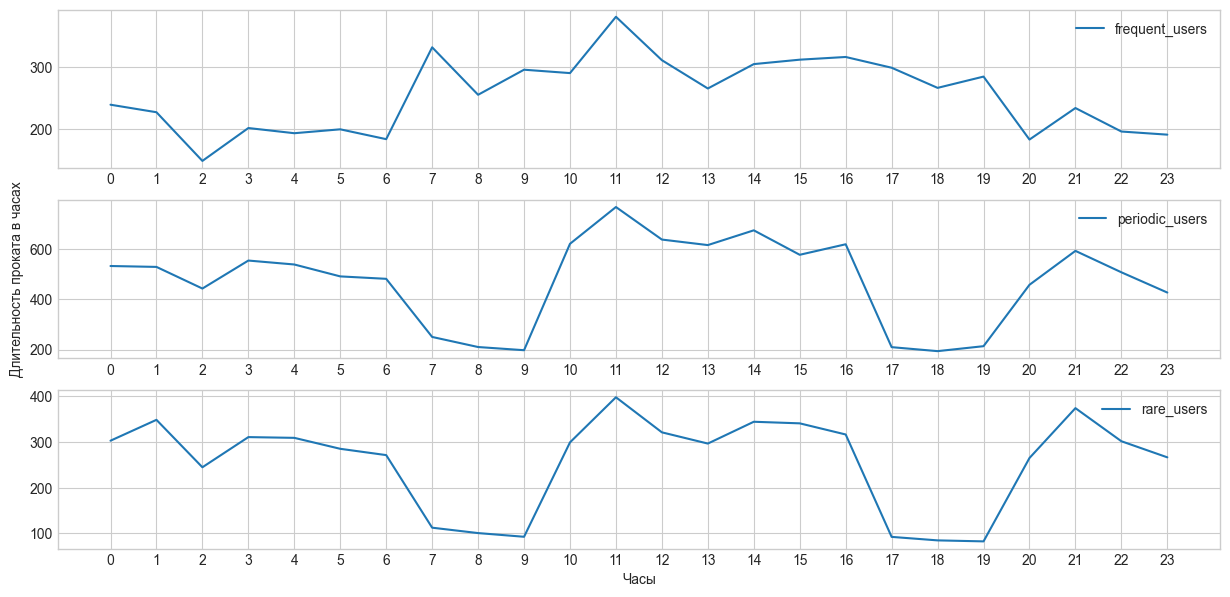

In [53]:
fig, ax = plt.subplots(3,1, figsize=(15,7))
ax[0].plot(freq_hour_dict.keys(), freq_hour_dict.values(), 
           label='frequent_users')
ax[1].plot(periodic_hour_dict.keys(), periodic_hour_dict.values(),
           label='periodic_users')
ax[2].plot(rare_hour_dict.keys(), rare_hour_dict.values(), 
           label='rare_users')

for i in range(3):
    ax[i].legend()
    
ax[1].set_ylabel('Длительность проката в часах')
plt.xlabel('Часы')
plt.show()

Для дней недели

In [54]:
freq_daily_dict = get_hour_distribution(frequent_users, is_dates=True)
periodic_daily_dict = get_hour_distribution(periodic_users, is_dates=True)
rare_daily_dict = get_hour_distribution(rare_users, is_dates=True)

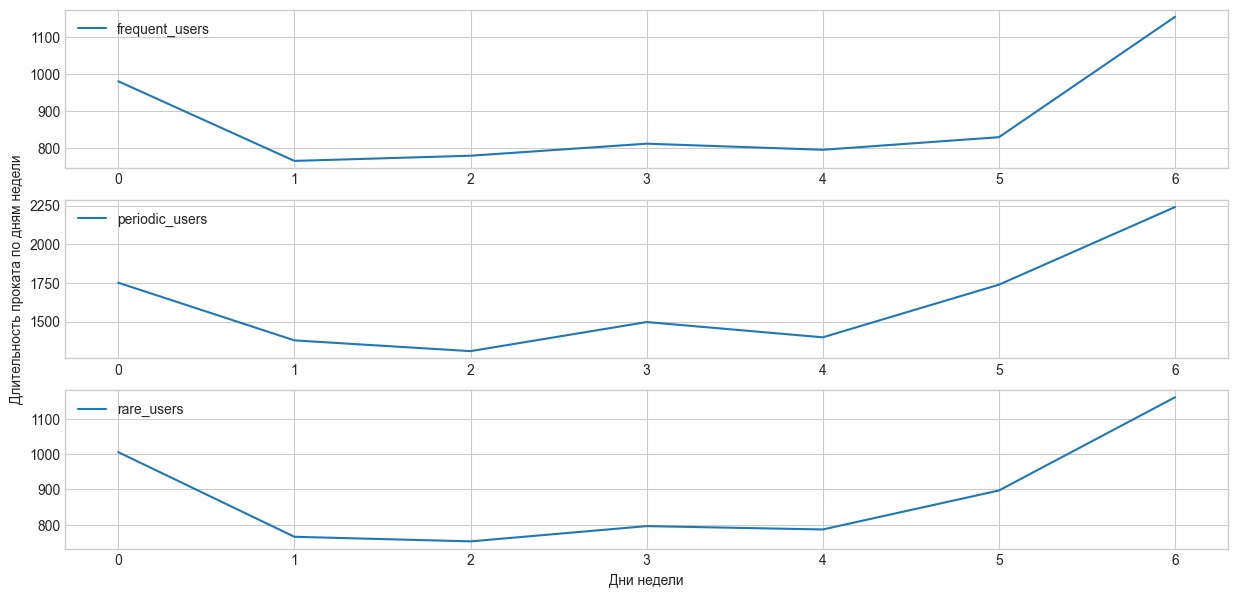

In [55]:
fig, ax = plt.subplots(3,1, figsize=(15,7))
ax[0].plot(freq_daily_dict.keys(), freq_daily_dict.values(), 
           label='frequent_users')
ax[1].plot(periodic_daily_dict.keys(), periodic_daily_dict.values(),
           label='periodic_users')
ax[2].plot(rare_daily_dict.keys(), rare_daily_dict.values(), 
           label='rare_users')

for i in range(3):
    ax[i].legend()
    
ax[1].set_ylabel('Длительность проката по дням недели')
plt.xlabel('Дни недели')
plt.show()

Смотря на графики, можно подумать, что я перепутал подписи, однако это не так. Мы видим, что у rare_users и periodic_users графики более резкие, что связано с циклами работы. frequent_users стабильнее берут велосипеды в прокат, поэтому у них график более плавный. Это, скорее всего, связано с тем, что эти пользователи не чаще используют велосипеды как средство постоянного перемещения, а не способ добраться до работы


### Влияние внешних факторов

Построим матрицы корреляции


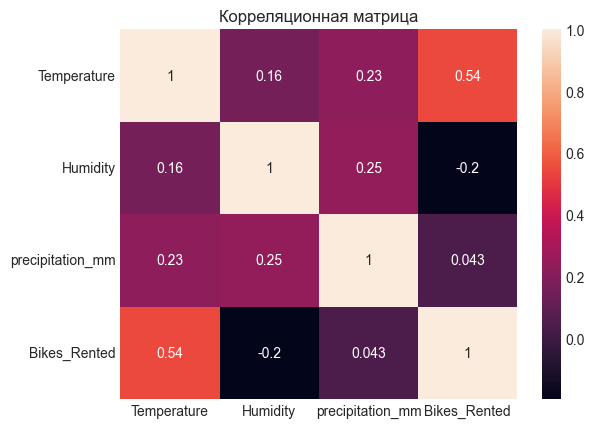

In [56]:
corr_data = new_data[['Temperature', 'Humidity', 'precipitation_mm', 'Bikes_Rented']]

corr_matrix = corr_data.corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Корреляционная матрица')
plt.show()

Достаточно высокая корреляция у кол-во прокатов велосипедов и темперетуры

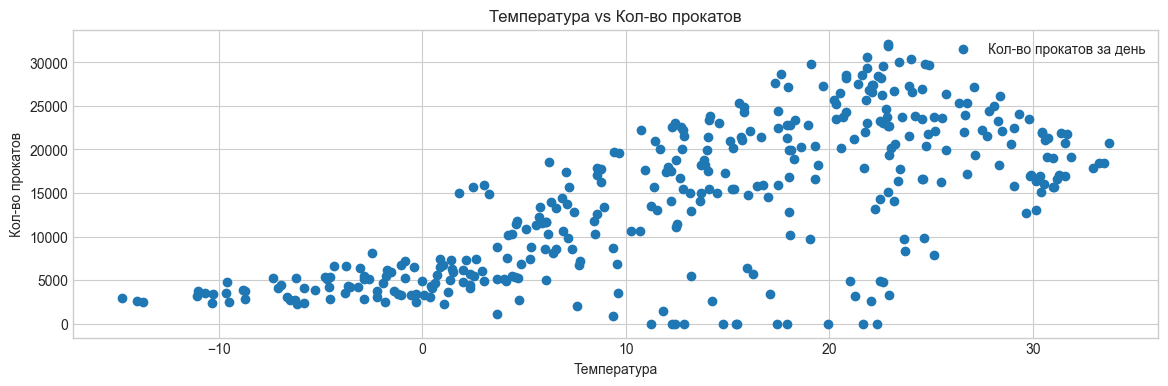

In [57]:
fig = plt.figure(figsize=(14,4))

# plt.yscale('log')

plt.scatter(daily_temperature, daily_rented_bikes, label='Кол-во прокатов за день')
plt.xlabel('Температура')
plt.ylabel('Кол-во прокатов')
plt.title('Температура vs Кол-во прокатов')
plt.legend()
plt.show()

Кол-во прокатов с увеличением температуры до 23 градусов растет, а потом начинает падать, так как большая температура является слишком жаркой


In [58]:
rain_days = new_data.groupby('Rainfall')['Bikes_Rented'].mean()
rain_days.index = rain_days.index.map(lambda x : 0 if x == 0 else 1)

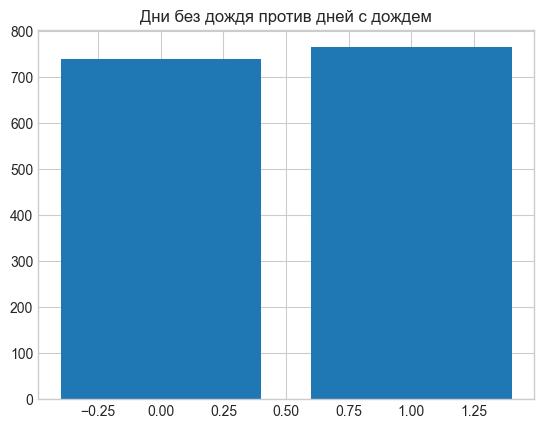

In [59]:
plt.bar(rain_days.index, rain_days.values)
plt.title('Дни без дождя против дней с дождем')
plt.show()

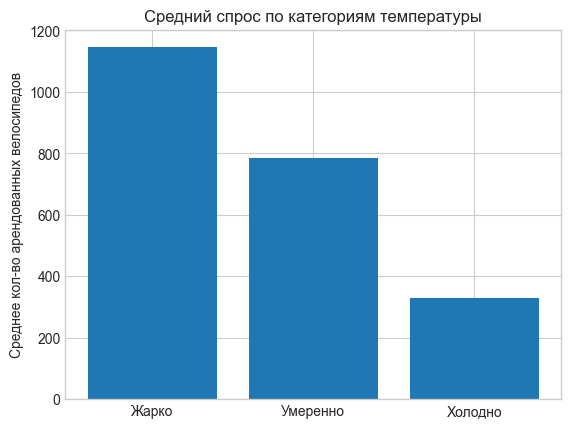

In [60]:
def temp_category(temperature):
    if temperature < 10:
        return 'Холодно'
    elif temperature <= 21:
        return 'Умеренно'
    else:
        return 'Жарко'


new_data['Temperature_Category'] = new_data['Temperature'].apply(temp_category)
group_by_temp = new_data.groupby('Temperature_Category')['Bikes_Rented'].mean()

plt.bar(group_by_temp.index, group_by_temp.values)
plt.title('Средний спрос по категориям температуры')
plt.ylabel('Среднее кол-во арендованных велосипедов')
plt.show()


Воспользуюсь функцией из первой лабораторной


In [61]:
def apply_filter(data: np.array, kernel: np.array) -> np.ndarray:
  """Функция для сглаживания данных"""
  result = np.zeros(len(data))
  kernel_size = len(kernel)
  # Добавим элементов, чтобы при проходе мы не выходили за пределы массива
  padded_data = np.pad(data, (kernel_size-1, 0))

  # Проходим окном и сглаживаем данные
  for i in range(len(data)):
    result[i] = np.dot(padded_data[i:i+kernel_size], kernel)
  return result

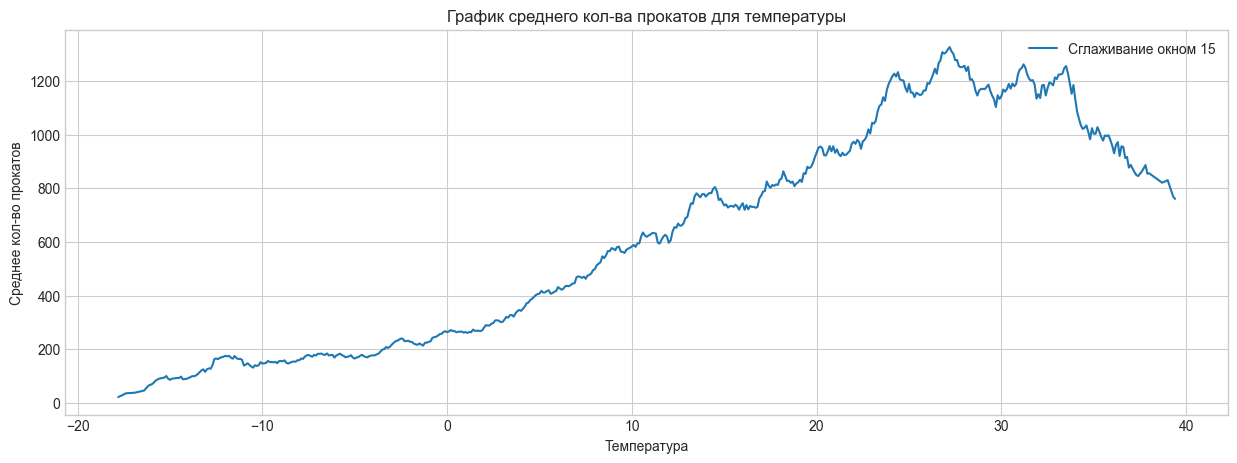

In [62]:
fig = plt.figure(figsize=(15,5))

temp = new_data.groupby('Temperature')['Bikes_Rented'].mean()
k = 15
smoothed_temp_data = apply_filter(temp.values, kernel=[1/k for _ in range(k)])

plt.plot(temp.index, smoothed_temp_data, label=f'Сглаживание окном {k}')
plt.title('График среднего кол-ва прокатов для температуры')
plt.ylabel('Среднее кол-во прокатов')
plt.xlabel('Температура')
plt.legend()
plt.show()

Как видно по графику, порогового значения в 0 градусов нет, однако есть пороговое значение 27 градусов, при котором прокат приобретает тенденцию на спад. 

На прокат не сильно влияет наличие дождя, а вот температура имеет большое значение: при <10 градусов кол-во прокатов резко падает.

### Пользовательские метрики и прогнозирование

In [63]:
def comfort_coeff(row):
    '''
    Функция для расчета пользовательского коэффициента 
    комфорта на основе 'температуры' и 'осадков'
    '''
    temperature = row['Temperature']
    precipitation_mm = row['precipitation_mm']
    
    if temperature < 0:
        if precipitation_mm < 1:
            return 0.3
        elif precipitation_mm < 5:
            return 0.2
        elif precipitation_mm < 10:
            return 0.1
        else:
            return 0
    elif temperature < 10:
        if precipitation_mm < 1:
            return 0.5
        elif precipitation_mm < 5:
            return 0.4
        elif precipitation_mm < 10:
            return 0.3
        else:
            return 0.1
    elif temperature < 21:
        if precipitation_mm < 1:
            return 0.8
        elif precipitation_mm < 5:
            return 0.6
        elif precipitation_mm < 10:
            return 0.5
        else:
            return 0.4
    elif temperature < 28:
        if precipitation_mm < 1:
            return 1
        elif precipitation_mm < 5:
            return 0.8
        elif precipitation_mm < 10:
            return 0.7
        else:
            return 0.5
    else:
        if precipitation_mm < 1:
            return 0.7
        elif precipitation_mm < 5:
            return 0.6
        elif precipitation_mm < 10:
            return 0.5
        else:
            return 0.1


In [64]:
new_data['Comfort_coeff'] = new_data.apply(comfort_coeff, axis=1)

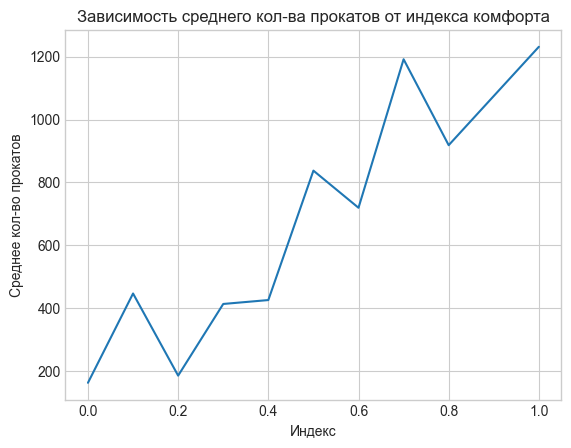

In [65]:
group_by_comfort_coeff: pd.DataFrame = new_data.groupby('Comfort_coeff')['Bikes_Rented'].mean()
plt.plot(group_by_comfort_coeff.index, group_by_comfort_coeff.values)
plt.title('Зависимость среднего кол-ва прокатов от индекса комфорта')
plt.xlabel('Индекс')
plt.ylabel('Среднее кол-во прокатов')
plt.show()

In [66]:
def linear_reg(data, only_temp=None):
    a0 = 100
    a1 = -20
    a2 = 250

    if only_temp:
        return data['Temperature'] * a0
    else:
        return (data['Temperature'] * a0 +
                                      data['precipitation_mm'] * a1 +
                                      data['Is_Official_Holiday'] * a2)

predicted_Bikes_Rented = linear_reg(new_data)

new_data['Predicted_Bikes_Rented'] = predicted_Bikes_Rented
print(np.linalg.norm(new_data['Bikes_Rented'] - predicted_Bikes_Rented))

92083.9249694124


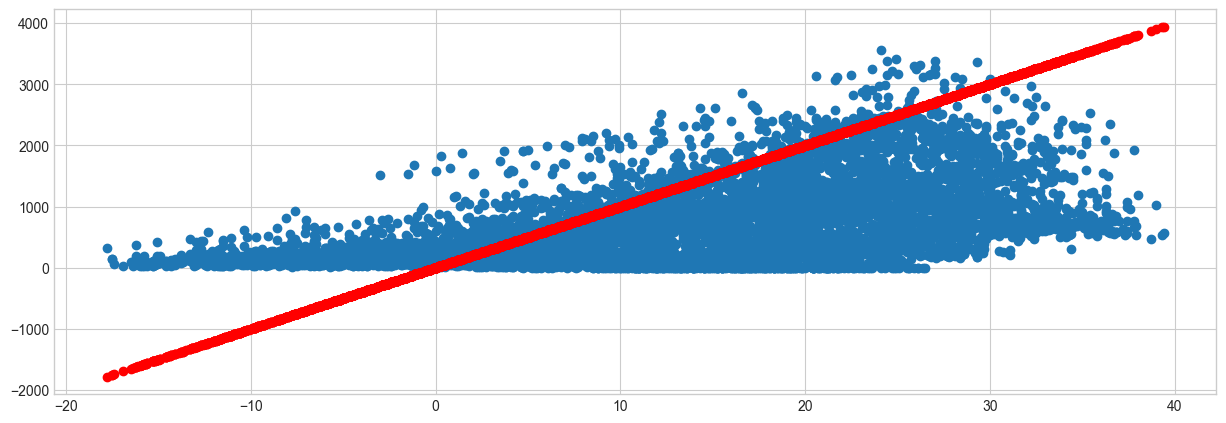

In [67]:
fig = plt.figure(figsize=(15,5))
plt.scatter(new_data['Temperature'], new_data['Bikes_Rented'])
temp_sorted = new_data[['Temperature', 'Predicted_Bikes_Rented']].sort_values(
    by='Temperature'
)
plt.scatter(new_data['Temperature'], linear_reg(new_data, only_temp=True), color='r')

Индекс комфорта дня оказался достаточно хорошей метрикой. Если его немного довести до ума, то можно получить вполне хорошую метрику, которая будет неплохо отражать сразу 2 признака

# 4. Автоматизация работы с данными

## Функции для формирования отчётов

In [68]:
new_data.head()

,Id,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,...,Season_Summer,Season_Winter,Day_of_week,Is_Official_Holiday,min_temp_c,max_temp_c,precipitation_mm,Temperature_Category,Comfort_coeff,Predicted_Bikes_Rented
2017-12-01,0.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,...,0.0,1.0,4.0,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-555.103759
2017-12-01,1.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,...,0.0,1.0,4.0,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-585.103759
2017-12-01,2.0,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,...,0.0,1.0,4.0,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-635.103759
2017-12-01,3.0,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,...,0.0,1.0,4.0,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-655.103759
2017-12-01,4.0,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,...,0.0,1.0,4.0,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-635.103759


               sum        mean    max   min
period                                     
2017-12-01   811.9   38.661905   93.0   7.8
2017-12-02  1536.8   74.906905  154.8  14.8
2017-12-03  2216.8  104.472122  216.9  16.1
2017-12-04  2865.4  138.608964  310.6  20.2
2017-12-05  3523.2  175.153409  391.8  24.4


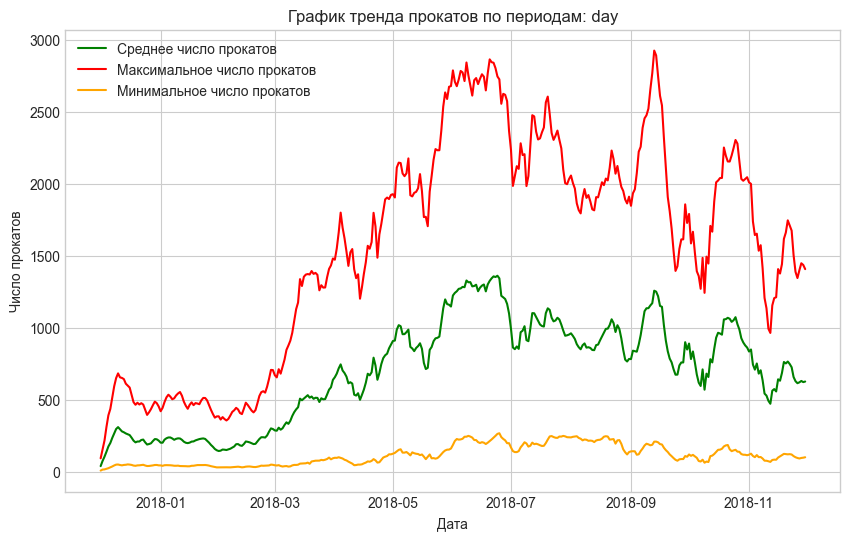

                sum        mean    max   min
period                                      
2017-11-27   4433.6   69.275000  186.0   2.6
2017-12-04  12725.4  128.502143  373.4   4.4
2017-12-11  19191.8  174.690714  509.8  12.2
2017-12-18  24709.4  214.385678  644.0  12.8
2017-12-25  30629.0  256.972729  771.2  17.2


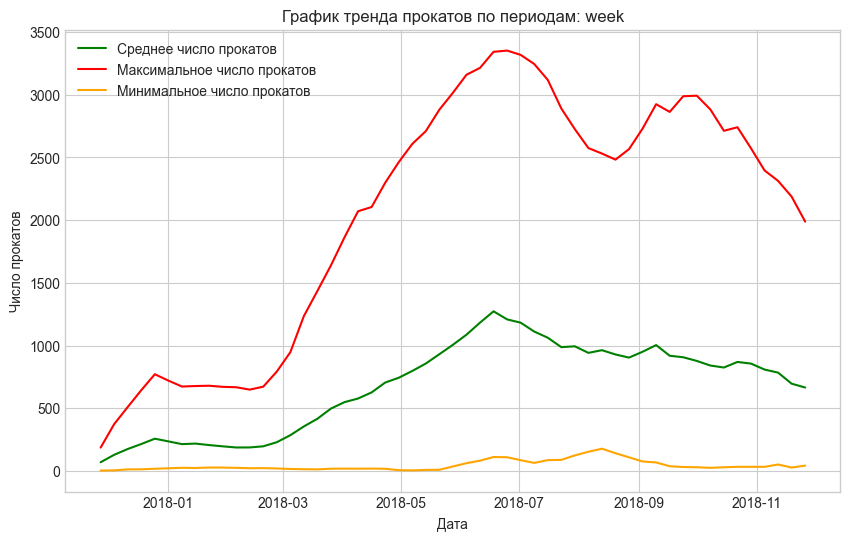

                 sum        mean     max  min
period                                       
2017-12-01   30629.0   49.242765   187.4  0.6
2018-01-01   55626.4   89.047542   327.8  4.8
2018-02-01   81199.2  133.990952   507.2  6.2
2018-03-01  144052.2  236.025043   927.2  6.6
2018-04-01  229477.0  380.567852  1442.6  6.6


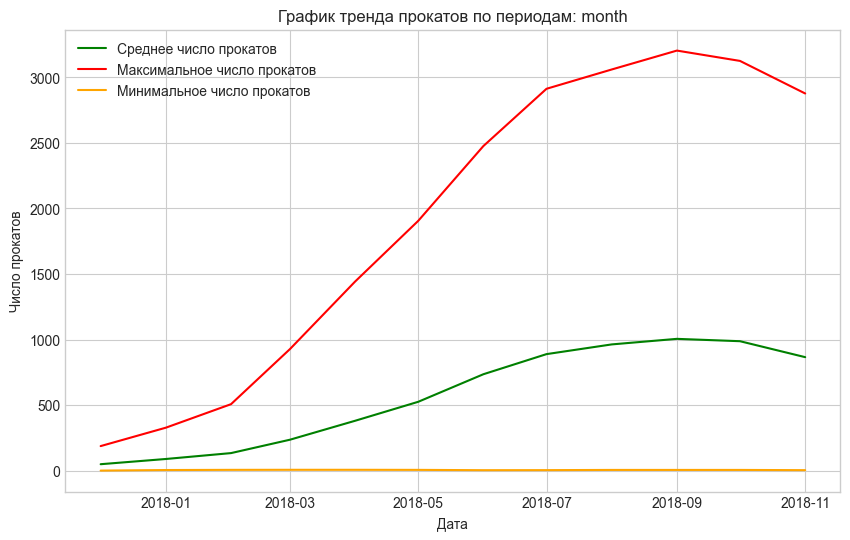

In [69]:
def generate_report(data, period='day', k=5, print_summary=True):
    '''Функция для формирования отчета по данным.'''
    if period == 'day':
        data['period'] = data.index.date
    elif period == 'week':
        data['period'] = data.index.to_period('W').to_timestamp()
    elif period == 'month':
        data['period'] = data.index.to_period('M').to_timestamp()
    else:
        raise ValueError("Invalid period.")
    
    # Аггрегируем данные
    summary = data.groupby('period')['Bikes_Rented'].agg(['sum', 'mean', 'max', 'min'])
    summary['sum'] = apply_filter(summary['sum'].values, [1/k for _ in range(k)])
    summary['mean'] = apply_filter(summary['mean'].values, [1/k for _ in range(k)])
    summary['max'] = apply_filter(summary['max'].values, [1/k for _ in range(k)])
    summary['min'] = apply_filter(summary['min'].values, [1/k for _ in range(k)])

    if print_summary:
        print(summary.head())
    
    plt.figure(figsize=(10, 6))
    # plt.plot(summary.index, summary['sum'], label='Общее число прокатов', color='b')
    plt.plot(summary.index, summary['mean'], label='Среднее число прокатов', color='g')
    plt.plot(summary.index, summary['max'], label='Максимальное число прокатов', color='r')
    plt.plot(summary.index, summary['min'], label='Минимальное число прокатов', color='orange')
    
    plt.title(f"График тренда прокатов по периодам: {period}")
    plt.xlabel('Дата')
    plt.ylabel('Число прокатов')
    plt.legend()
    plt.grid(True)
    plt.show()
    data.drop(columns=['period'], inplace=True)


generate_report(new_data, period='day', k=10)
generate_report(new_data, period='week')
generate_report(new_data, period='month')


In [70]:
def average_rentals_by_conditions(data, temp_min, temp_max, rain):
    '''Функция для получения среднего числа прокатов по условиям.'''
    filtered_data = data[(data['Temperature'] >= temp_min) & 
                          (data['Temperature'] <= temp_max) & 
                          (data['Rainfall'] == rain)]
    
    return filtered_data['Bikes_Rented'].mean()

In [71]:
example1 = average_rentals_by_conditions (new_data, temp_min=5, temp_max=17,
                                         rain=1)
example1

84.71428571428571

In [72]:
example2 = average_rentals_by_conditions (new_data, temp_min=5, temp_max=17,
                                         rain=0)
example2

662.6933673469388

### Сводные таблицы и визуализация зависимостей

In [73]:
new_data.head()

,Id,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,...,Season_Summer,Season_Winter,Day_of_week,Is_Official_Holiday,min_temp_c,max_temp_c,precipitation_mm,Temperature_Category,Comfort_coeff,Predicted_Bikes_Rented
2017-12-01,0.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,...,0.0,1.0,4.0,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-555.103759
2017-12-01,1.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,...,0.0,1.0,4.0,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-585.103759
2017-12-01,2.0,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,...,0.0,1.0,4.0,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-635.103759
2017-12-01,3.0,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,...,0.0,1.0,4.0,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-655.103759
2017-12-01,4.0,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,...,0.0,1.0,4.0,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-635.103759


In [74]:
def split_day_by_coeff(row):
    comfort_coeff = row['Comfort_coeff']

    if comfort_coeff < 0.3:
        return 'Дождь/Снег'
    elif comfort_coeff < 0.6:
        return 'Дождь'
    else: 
        return 'Ясно'
    
def split_day_by_time(row):
    hour = row['Hour']

    if 4 <= hour <= 9: 
        return 'Утро'
    elif hour <= 17:
        return 'День'
    else: 
        return 'Вечер'

In [75]:
new_data['Month'] = new_data.index.to_period('M')
new_data['Day_category'] = new_data.apply(split_day_by_coeff, axis=1)
new_data['Part_of_day'] = new_data.apply(split_day_by_time, axis=1)

In [85]:
new_data.head()

,Id,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,...,Is_Official_Holiday,min_temp_c,max_temp_c,precipitation_mm,Temperature_Category,Comfort_coeff,Predicted_Bikes_Rented,Month,Day_category,Part_of_day
2017-12-01,0.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,...,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-555.103759,2017-12,Дождь/Снег,День
2017-12-01,1.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,...,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-585.103759,2017-12,Дождь/Снег,День
2017-12-01,2.0,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,...,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-635.103759,2017-12,Дождь/Снег,День
2017-12-01,3.0,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,...,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-655.103759,2017-12,Дождь/Снег,День
2017-12-01,4.0,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,...,0.0,-7.6,-2.2,1.755188,Холодно,0.2,-635.103759,2017-12,Дождь/Снег,Утро


In [76]:
pivot_month_day_of_week = new_data.pivot_table(index='Month', columns='Day_of_week',
                                               values='Bikes_Rented')
pivot_month_day_of_week.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                   'Friday', 'Saturday', 'Sunday']
pivot_month_day_of_week

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Month,,,,,,,
2017-12,208.783133,243.269231,219.782051,281.219512,330.821782,256.895238,171.063158
2018-01,203.854369,211.835052,205.902913,195.064103,213.337209,179.654762,176.376623
2018-02,266.807692,278.750000,224.463415,229.011765,228.506494,175.304878,170.320988
2018-03,447.901235,577.287671,562.058140,415.607843,576.020408,580.039216,398.648649
2018-04,718.202020,830.000000,678.527027,725.844156,889.727273,692.060241,567.410000
2018-05,1270.612500,1034.479592,868.126316,685.846939,1056.628205,930.848101,1009.493976
2018-06,1205.679487,1140.394737,1381.973333,1078.405405,1405.118812,1218.434343,1279.609756
2018-07,762.114583,1067.202128,1124.060241,1159.844156,1165.961039,1014.605263,755.067961
2018-08,811.344828,874.402597,841.774510,846.961165,964.723810,983.545455,844.370370


In [77]:
pivot_weather_day = new_data.pivot_table(index='Day_category', 
                                         columns='Part_of_day', 
                                         values='Bikes_Rented')
pivot_weather_day

Part_of_day,Вечер,День,Утро
Day_category,,,
Дождь,962.550095,584.099251,472.910185
Дождь/Снег,281.418103,203.544843,190.249240
Ясно,1615.451977,929.967557,697.635000


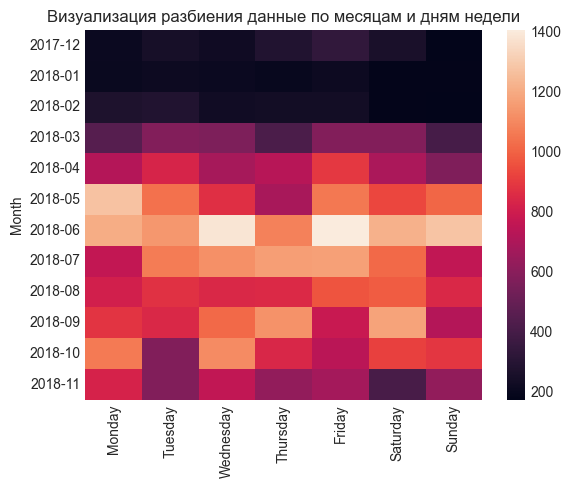

In [78]:
sns.heatmap(pivot_month_day_of_week)
plt.title('Визуализация разбиения данные по месяцам и дням недели')
plt.show()

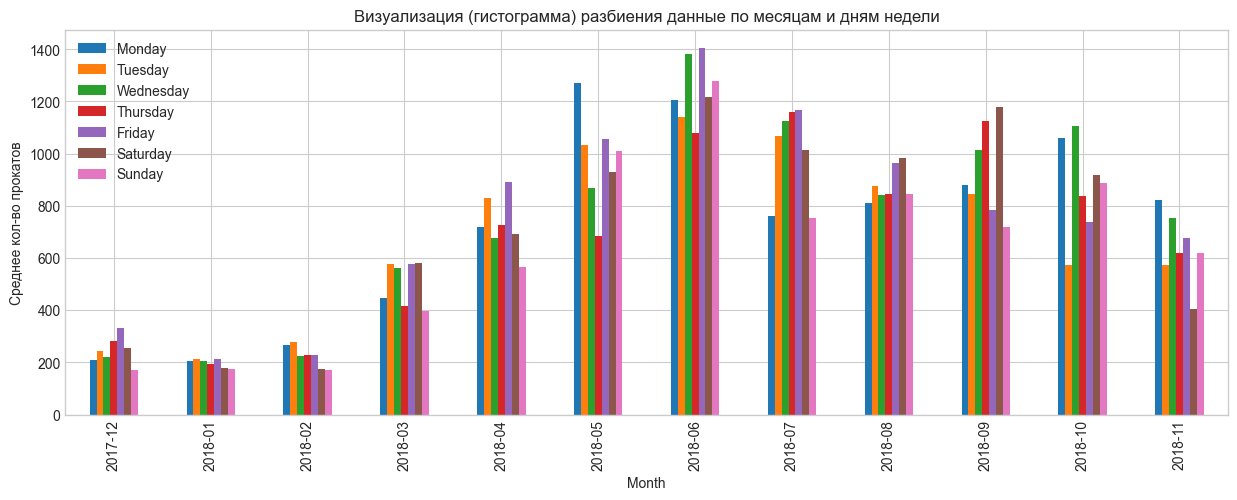

In [79]:
pivot_month_day_of_week.plot(kind='bar', figsize=(15,5))
plt.ylabel('Среднее кол-во прокатов')
plt.title('Визуализация (гистограмма) разбиения данные по месяцам и дням недели')
plt.show()

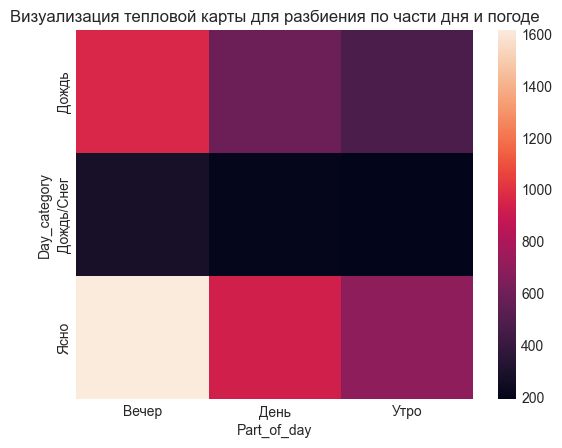

In [80]:
sns.heatmap(pivot_weather_day)
plt.title('Визуализация тепловой карты для разбиения по части дня и погоде')
plt.show()

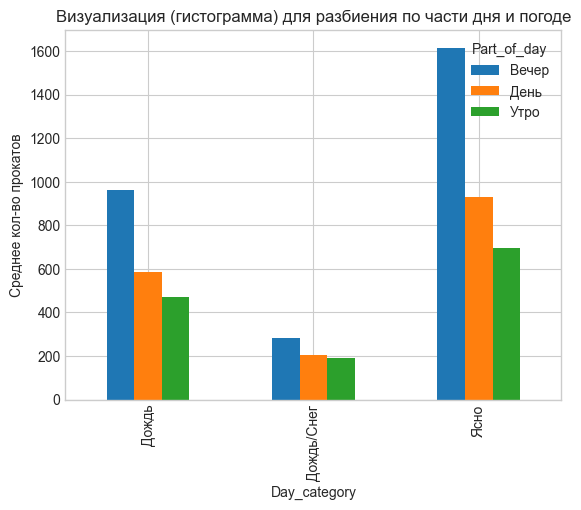

In [81]:
pivot_weather_day.plot(kind='bar')
plt.title('Визуализация (гистограмма) для разбиения по части дня и погоде')
plt.ylabel('Среднее кол-во прокатов')
plt.show()

In [82]:
holiday_pivot = new_data.pivot_table(index='Is_Official_Holiday', 
                                     columns='Part_of_day',
                                     values='Bikes_Rented')
holiday_pivot

Part_of_day,Вечер,День,Утро
Is_Official_Holiday,,,
0.0,1072.553977,637.074380,477.542547
1.0,881.590164,640.735537,279.517241


# 5. Отчет
1. Описание данных:
Датасет содержит информацию об аренде велосипедов в Сеуле. Содержит следующие поля:

Дата и время аренды.
Погодные условия (температура, наличие осадков).
Количество арендованных велосипедов.
Самостоятельно добавил данные о: 
Дне недели и времени суток.

Данные были собраны из открытых источников (kaggle, сайты о погоде) с информацией о прокате велосипедов и погодных условиях в Сеуле.

2. Основные тенденции:

Общий уровень спроса рос до середины июля, где начал постепенно снижаться к холодному времени года.
Пик спроса наблюдался в теплые летние месяцы. Дно спроса - зима, холодные температуры.

3. Сезонность:

Дни недели: Наибольший спрос наблюдается в рабочие дни (с понедельника по пятницу).

Время суток: Пики аренды приходятся на утренние (8:00) и вечерние (17:00) часы, что связано с использованием велосипедов для поездок на работу и обратно.

Месяцы: Спрос выше в теплые месяцы (весна, лето) и ниже в холодные (осень, зима).

4. Выбросы:

Аномальные точек данных объясняются:

Часами пик, когда спрос значительно превышает средние значения (использование велосипедов для поездок на работу и обратно)

Праздничными днями, в которые спрос на аренду велосипедов снижается.

5. Влияние погоды:

Температура: Наблюдается положительная корреляция между температурой и спросом на аренду велосипедов.

Осадки: В дни без осадков спрос на аренду велосипедов значительно увеличивается.

Пороговые эффекты: Сильных пороговых значений нет. Спрос падает при холодной температуре и дожде.

6. Сегментация: 

Пользователи могут быть сегментированы по частоте использования:

Частые пользователи: В основном арендуют велосипеды в утром (8:00) и вечером (17:00). Скорее его, это рабочие, которые используют велосипеды для поездок на работу и обратно.

Нечастые пользователи: Используют велосипеды эпизодически, без выраженной регулярности. Скорее всего, это туристы и люди, которые берут велосипеды просто для отдыха и редких прогулок.

7. Выводы:

Основными пользователями сервиса аренды велосипедов являются рабочие, которые используют велосипеды для ежедневных поездок на работу и обратно. Пики спроса приходятся на утренние и вечерние часы в рабочие дни.

На спрос существенно влияют погодные условия: в теплую и сухую погоду спрос увеличивается, тогда как в холодное время года и в дождливые дни наблюдается снижение аренды.

# 6. Интерактивные графики

In [83]:
new_data.describe()

,Id,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,...,Season_Spring,Season_Summer,Season_Winter,Day_of_week,Is_Official_Holiday,min_temp_c,max_temp_c,precipitation_mm,Comfort_coeff,Predicted_Bikes_Rented
count,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,...,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000
mean,4362.661295,11.497658,12.838871,58.258127,1.720441,1439.033333,4.048223,0.568001,0.150510,0.074050,...,0.250413,0.251102,0.250551,3.009229,0.033058,8.622851,16.807767,6.925204,0.485317,1153.647439
std,2531.561970,6.933540,12.043146,20.358714,1.039105,606.862754,13.141417,0.866972,1.169305,0.426481,...,0.433281,0.433677,0.433360,1.999255,0.178800,11.831001,13.053793,10.280640,0.205696,1174.642526
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-17.800000,-2.200000,0.000000,0.000000,-1815.103759
25%,2155.750000,5.000000,3.200000,42.000000,0.900000,941.750000,-4.725000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,-1.100000,-2.200000,1.755188,0.300000,229.892537
50%,4358.500000,11.000000,13.700000,57.000000,1.500000,1699.000000,5.100000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,8.180443,17.300000,7.521493,0.500000,1169.570149
75%,6559.250000,18.000000,22.600000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,...,1.000000,1.000000,1.000000,5.000000,0.000000,18.900000,27.700000,8.684916,0.600000,2099.570149
max,8759.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,...,1.000000,1.000000,1.000000,6.000000,1.000000,30.300000,39.200000,97.000000,1.000000,3816.301676


In [84]:
# График прокатов по времени
time_series_fig = px.line(new_data, 
                          x=new_data.index,
                          y='Bikes_Rented',
                          title='Временной ряд прокатов')
# Слайдер для интерактивности
time_series_fig.update_xaxes(rangeslider_visible=True)

# График зависимости прокатов от температуры
scatter_fig = px.scatter(new_data, 
                         x='Temperature', 
                         y='Bikes_Rented',
                         color='Rainfall', # Цвет точек зависит от кол-ва осадков
                         labels={'Temperature': 'Температура (°C)', 'Bikes_Rented': 'Количество прокатов'},
                         title='Зависимость прокатов от температуры и осадков')

time_series_fig.show()
scatter_fig.show()